In [0]:
#Resources: https://www.youtube.com/watch?v=BzcBsTou0C0&list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh&index=1

import torch
import torchvision #datasets
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [0]:
#A tensor is a generalization of vectors and matrices and is easily understood as a multidimensional array.
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [0]:
#Numpy calls tensors (high dimensional matrices or vectors) arrays while in PyTorch there’s just called tensors. 
#In terms of array operations, pytorch is considerably fast over numpy.
#Even if you already know Numpy, there are still a couple of reasons to switch to PyTorch for tensor computation. The main reason is the GPU acceleration. 
#As you’ll see, using a GPU with PyTorch is super easy and super fast. If you do large computations, this is beneficial because it speeds things up a lot.
x = torch.zeros(2,5)
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [0]:
y = torch.rand(2,10) 
print(y)

tensor([[0.4221, 0.2700, 0.0029, 0.2225, 0.8350, 0.0611, 0.6138, 0.8387, 0.5951,
         0.9001],
        [0.6105, 0.8458, 0.0523, 0.8411, 0.2246, 0.5174, 0.5468, 0.6021, 0.1025,
         0.1139]])


In [0]:
#A flatten operation on a tensor reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. 
#This is the same thing as a 1d-array of elements. Flattening a tensor means to remove all of the dimensions except for one.
y = torch.flatten(y)
print(y)
#y.view([1,20])

tensor([0.4221, 0.2700, 0.0029, 0.2225, 0.8350, 0.0611, 0.6138, 0.8387, 0.5951,
        0.9001, 0.6105, 0.8458, 0.0523, 0.8411, 0.2246, 0.5174, 0.5468, 0.6021,
        0.1025, 0.1139])


In [0]:
#We are going to work with the MNIST dataset
#Transforms are common image transformations. They can be chained together using Compose. It basically composes several transforms together.
train_df = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])) 
test_df = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])) 

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
#At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset.
trainset = torch.utils.data.DataLoader(train_df, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test_df, batch_size=10, shuffle=True)

In [0]:
#Iterate over data
for data in trainset:
  print(data)
  break

#This is our entire batch and so it'll be 10 examples of handwritten digits and then 10 tensors of the actual output 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [0]:
x, y = data[0][0], data[1][0]
print(x)
print(y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

torch.Size([1, 28, 28])


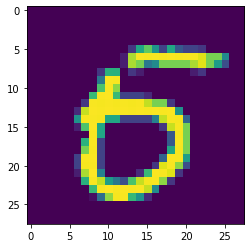

In [0]:
print(data[0][0].shape)

plt.imshow(data[0][0].view(28,28))
plt.show()

In [0]:
#Make sure your data is balanced
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [0]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [0]:
class Net(nn.Module):

  def __init__(self):
    super().__init__() #Your parent's class initialization method is going to run

    #nn.Linear: Fully connected layers
    #Our images are 28x28 and we can't pass the image to the layer, instead we pass the flattened image. So, you can think of the pixels like rows and
    #when we flatten those there are just many rows of pixels (which is why the input will be a flattened 28x28).
    #Our target here is to make a three layers of 64 neurons for our hidden layers, so the output will be 64. Basically, the output can be whatever we want.
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64) #This second layer takes in as input 64 because the previous layer's output is 64
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10) #This is our output layer and we want our output to be 10 because we have 10 classes (numbers from 0 to 9)

  #The the method below defines how the data will flow through our network
  def forward(self, x): 
    #We are going to run our activation function (relu) literally over the entire layer
    #Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network,
    #and determines whether it should be activated ("fired") or not, based on whether each neuron's input is relevant for the model's prediction.
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    #Keep in mind that the activation function runs on the output. We are not actually running anything on the output layer because here our goal is to 
    #determine the class and in order to do that we're going to do a probability distribution on the output (which is why we are going to use log softmax).
    x = F.log_softmax(self.fc4(x), dim=1)

    return x

In [0]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = torch.rand((28,28))
X = X.view(-1,28*28) #X.view(1,28*28)
X

tensor([[2.4014e-01, 3.8980e-01, 7.6535e-01, 8.9395e-01, 7.1044e-01, 5.6709e-01,
         7.8077e-01, 2.3660e-01, 5.3044e-01, 7.1059e-01, 2.4782e-01, 6.4117e-01,
         9.5768e-01, 7.5698e-01, 1.4305e-01, 3.4686e-02, 8.2092e-01, 5.1924e-01,
         9.9876e-01, 2.4888e-01, 5.0057e-01, 2.2124e-01, 1.6937e-01, 2.7568e-01,
         1.2490e-01, 1.1157e-03, 9.0571e-01, 2.3275e-01, 7.5882e-01, 4.0628e-01,
         2.1127e-01, 6.4473e-01, 2.0017e-02, 1.2818e-01, 4.8984e-01, 7.8681e-01,
         4.7771e-01, 8.3585e-01, 8.6664e-01, 9.9834e-01, 6.6482e-01, 4.3012e-01,
         9.4670e-02, 7.3326e-01, 9.6806e-01, 6.7991e-01, 1.9850e-01, 2.6014e-01,
         9.3694e-01, 8.9259e-01, 2.5634e-01, 6.5660e-01, 8.2413e-01, 4.0320e-01,
         4.8985e-01, 7.2855e-01, 1.0828e-01, 8.2649e-01, 1.5629e-01, 1.5879e-02,
         4.0589e-01, 7.7031e-01, 4.0232e-01, 6.7716e-01, 1.0352e-01, 7.5841e-01,
         5.0430e-01, 6.5432e-01, 5.9099e-01, 5.3668e-01, 3.3041e-01, 7.3373e-02,
         2.3221e-02, 8.5248e

In [0]:
output = net(X)
output

tensor([[-2.4805, -2.3253, -2.2589, -2.1722, -2.3129, -2.3700, -2.2817, -2.3009,
         -2.2072, -2.3496]], grad_fn=<LogSoftmaxBackward>)

In [0]:
#The learning rate dictates the size of the step that the optimizer will take to get to the minimum
optimizer = optim.Adam(net.parameters(), lr=0.001)

#Iterate over data 
epochs = 3
for epoch in range(epochs): 
  for data in trainset: #data is a batch of feature sets and labels
    X, y = data #X: batch of features; y: batch of targets
    net.zero_grad() #Sets gradients to zero before calculating the loss
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward() #backpropagation
    optimizer.step() #This is going to adjust the weights for us
  print(loss) 

tensor(9.9277e-05, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)
tensor(0.0035, grad_fn=<NllLossBackward>)


In [0]:
correct = 0
total = 0

#When we're trying to validate our data we don't want our gradients to be calculated (this is testing data, we just want to see how right or wrong the model is)
with torch.no_grad():
    for data in testset:
      X, y = data
      output = net(X.view(-1, 28*28))
      for index, i in enumerate(output):
        if torch.argmax(i) == y[index]:
          correct += 1
        total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.974


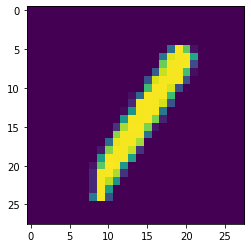

In [0]:
plt.imshow(X[0].view(28,28))
plt.show()

In [0]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(1, grad_fn=<NotImplemented>)
